In [ ]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import pyMELTScalc as M
import Thermobar as pt
import pickle

# sys.path.append(r'G:\My Drive\2022\GitHub\pyMELTScalc\MELTS')

import time
import random
from tqdm.notebook import tqdm, trange

import matplotlib as mpl
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

In [ ]:
Data = pd.read_excel('CpxOpxPlag_lowP.xlsx')

In [ ]:
with open('P_results_v120_test.obj', 'rb') as f:
    P_results = pickle.load(f)
    
with open('P_results_v102_test.obj', 'rb') as f:
    P_results_v102 = pickle.load(f)

In [ ]:
P_bar = np.linspace(100,7500,38)/1000

Data['P_kbar_calc'] = np.zeros(len(Data['SiO2_Liq']))*np.nan
Data['P_kbar_calc_min'] = np.zeros(len(Data['SiO2_Liq']))*np.nan

Data['P_kbar_calc_v102'] = np.zeros(len(Data['SiO2_Liq']))*np.nan
Data['P_kbar_calc_v102_min'] = np.zeros(len(Data['SiO2_Liq']))*np.nan

for i in P_results:
    Loc = np.where(P_results[i]['Res_abc'][0,0,:] == np.nanmin(P_results[i]['Res_abc']))
    if Loc is not None:
        Data['P_kbar_calc'].loc[int(i)] = np.nanmean(P_bar[Loc[0]])
        Data['P_kbar_calc_min'].loc[int(i)] = np.nanmin(P_results[i]['Res_abc'])
        
for i in P_results_v102:
    Loc = np.where(P_results_v102[i]['Res_abc'][0,0,:] == np.nanmin(P_results_v102[i]['Res_abc']))
    if Loc is not None:
        Data['P_kbar_calc_v102'].loc[int(i)] = np.nanmean(P_bar[Loc[0]])
        Data['P_kbar_calc_v102_min'].loc[int(i)] = np.nanmin(P_results_v102[i]['Res_abc'])

C:\Users\Matt Gleeson\AppData\Local\Temp\ipykernel_5108\3671709253.py:10: RuntimeWarning: All-NaN slice encountered
  Loc = np.where(P_results[i]['Res_abc'][0,0,:] == np.nanmin(P_results[i]['Res_abc']))
C:\Users\Matt Gleeson\AppData\Local\Temp\ipykernel_5108\3671709253.py:12: RuntimeWarning: Mean of empty slice
  Data['P_kbar_calc'].loc[int(i)] = np.nanmean(P_bar[Loc[0]])
C:\Users\Matt Gleeson\AppData\Local\Temp\ipykernel_5108\3671709253.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Data['P_kbar_calc'].loc[int(i)] = np.nanmean(P_bar[Loc[0]])
C:\Users\Matt Gleeson\AppData\Local\Temp\ipykernel_5108\3671709253.py:13: RuntimeWarning: All-NaN slice encountered
  Data['P_kbar_calc_min'].loc[int(i)] = np.nanmin(P_results[i]['Res_abc'])
C:\Users\Matt Gleeson\AppData\Local\Temp\ipykernel_5108\3671709253.

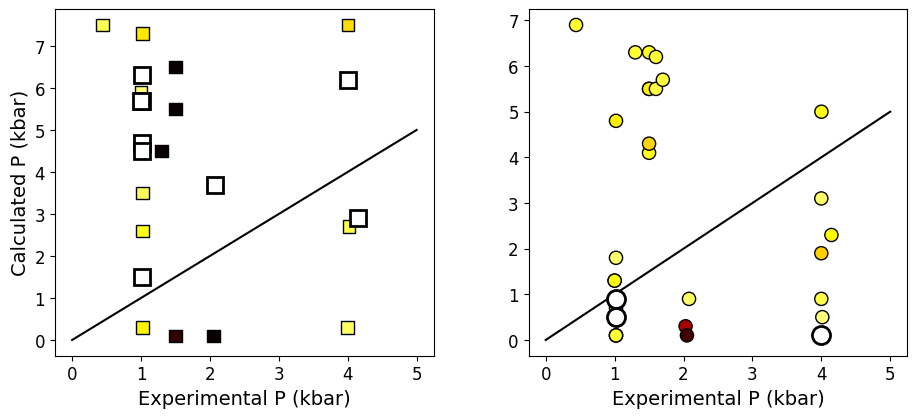

In [ ]:
T_cut = 20

f, a = plt.subplots(1,2, figsize=(11, 4.5))
plt.subplots_adjust(hspace = 0.0, wspace = 0.25)

a[0].plot([0,5],[0,5], '-k')
s = a[0].scatter(Data['P_kbar'], Data['P_kbar_calc'], 80, c = Data['P_kbar_calc_min'],
                 edgecolor = 'k', cmap = "hot_r", vmin = 0, vmax = 150, marker = 's')
a[0].plot(Data['P_kbar'][Data['P_kbar_calc_min'] < T_cut], 
          Data['P_kbar_calc'][Data['P_kbar_calc_min'] < T_cut], 'sw', 
          markersize = 12, markeredgecolor = 'k', mew = 2)
a[0].set_xlabel('Experimental P (kbar)')
a[0].set_ylabel('Calculated P (kbar)')
#f.colorbar(s, ax=a[0], label='$\Delta$T ($^{o}$C)')

a[1].plot([0,5],[0,5], '-k')
a[1].scatter(Data['P_kbar'], Data['P_kbar_calc_v102'], 90, c = Data['P_kbar_calc_v102_min'], 
             edgecolor = 'k', cmap = "hot_r", vmin = 0, vmax = 150, marker = 'o')
a[1].plot(Data['P_kbar'][Data['P_kbar_calc_v102_min'] < T_cut], 
          Data['P_kbar_calc_v102'][Data['P_kbar_calc_v102_min'] < T_cut], 
          'ow', markersize = 13, markeredgecolor = 'k', mew = 2)
a[1].set_xlabel('Experimental P (kbar)')

plt.savefig('AB.pdf', dpi = 300)

Moore, G., and Carmichael, I.S.E. (1998)
PEM12-19


findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


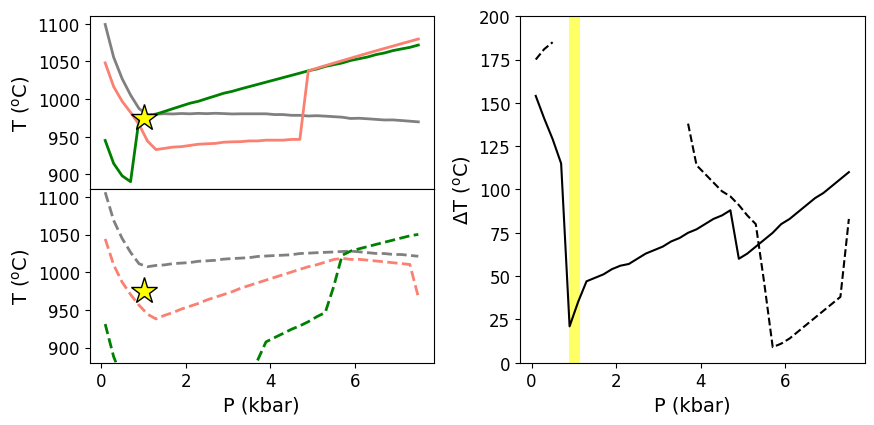

In [ ]:
sample='34'

print(Data['Citation'].loc[int(sample)])
print(Data['Experiment'].loc[int(sample)])

figure_mosaic="""
AC
BC
"""
fig,axes=plt.subplot_mosaic(mosaic=figure_mosaic, figsize=(10, 4.5), sharex=True)
plt.subplots_adjust(hspace = 0.0, wspace = 0.25)

axes['A'].plot(P_bar, P_results_v102[sample]['a_sat'][0,0,:], '-', linewidth = 2, color = [0.5,0.5,0.5])
axes['A'].plot(P_bar, P_results_v102[sample]['b_sat'][0,0,:], '-g', linewidth = 2)
axes['A'].plot(P_bar, P_results_v102[sample]['c_sat'][0,0,:], '-', linewidth = 2, color = 'salmon')
axes['A'].plot(Data['P_kbar'].loc[int(sample)], Data['T_K'].loc[int(sample)]-273.15, '*k', 
               mfc = 'yellow', ms = 20)
axes['A'].set_ylabel('T ($^{o}$C)')
axes['A'].set_ylim([880, 1110])

axes['B'].plot(P_bar, P_results[sample]['a_sat'][0,0,:], '--', linewidth = 2, color = [0.5,0.5,0.5])
axes['B'].plot(P_bar, P_results[sample]['b_sat'][0,0,:], '--g', linewidth = 2)
axes['B'].plot(P_bar, P_results[sample]['c_sat'][0,0,:], '--', linewidth = 2, color = 'salmon')
axes['B'].plot(Data['P_kbar'].loc[int(sample)], Data['T_K'].loc[int(sample)]-273.15, '*k', 
               mfc = 'yellow', ms = 20)
axes['B'].set_ylabel('T ($^{o}$C)')
axes['B'].set_xlabel('P (kbar)')
axes['B'].set_ylim([880, 1110])


axes['C'].plot([Data['P_kbar'].loc[int(sample)],Data['P_kbar'].loc[int(sample)]],
              [0,200], '-', alpha = 0.6, lw = 8, c = 'yellow')
axes['C'].plot(P_bar, P_results_v102[sample]['Res_abc'][0,0,:], '-k')
axes['C'].plot(P_bar, P_results[sample]['Res_abc'][0,0,:], '--k')
axes['C'].set_ylabel('$\Delta$T ($^{o}$C)')
axes['C'].set_xlabel('P (kbar)')
axes['C'].set_ylim([0,200])

plt.savefig('CDE.pdf', dpi = 300)

In [17]:
Data['P_kbar_calc_v102'].loc[int(sample)]

0.9